# Задание

* Попробовать найти и показать различные инсайты в этом датасете с помощью графиков Seaborn, Matplotlib и Plotly
* Дополнить графики комментариями

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [2]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.tail()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
49995,57,F,<100,97,0.0,0.0,0.00,1247018.0,0.88,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,13775.933155
49996,58,F,Mega,34,0.0,0.0,0.00,1000000.0,0.00,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,8247.466438
49997,34,М,1M+,21,0.0,0.0,0.00,0.0,6450.93,73,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,1621.347671,0.179949,1973.128710
49998,43,М,<100,52,0.0,0.0,39318.52,0.0,4101.12,0,...,39318.52,48453.57,63442.406667,0.0,0.0,0.0,NaN,NaN,NaN,5101.543269
49999,32,F,<100,5,0.0,0.0,0.00,0.0,389.41,120,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,1383.538083,0.151800,781.388873


In [3]:
df.columns

Index(['age', 'gender', 'city_type', 'full_mob', 'ml_balance', 'cl_balance_0m',
       'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m', 'dc_trx_cnt',
       'dc_trx_sum', 'income', 'min_casa_balance_1q', 'max_casa_balance_1q',
       'avg_casa_balance_1Y', 'min_td_balance_1q', 'max_td_balance_1q',
       'avg_td_balance_1Y', 'min_loan_balance_1q', 'max_loan_balance_1q',
       'avg_loan_balance_1Y', 'min_cl_balance_1q', 'max_cl_balance_1q',
       'avg_cl_balance_1Y', 'loan_to_deposit', 'Avg_trx', 'avgtrx_to_balance',
       'nbi'],
      dtype='object')

In [4]:
df.td_balance_0m.unique()

array([      0.  ,   70000.  , 1103590.17, ..., 3200000.  ,  103405.85,
       1247018.  ])

## Plotly

In [5]:
# plotly

import plotly.express as px

In [6]:
# диаграмма рассеяния

fig = px.scatter(df[(df.income<500000) & (df.dc_trx_sum<5000000)], x="income", y="dc_trx_sum", color="city_type")
fig.show()

In [7]:
# будем строить диаграмму-бар, для этого соберем отдельный df , который группирует по группам возрастов и типу населенности города

df['index']=df.index


In [8]:
df['age_group']=0
for i in range(len(df.age)):
    if df.loc[i,'age'] <= 17:
        df.loc[i,'age_group'] = '0-17'
    elif df.loc[i,'age'] <= 30:
        df.loc[i,'age_group'] = '18-30'
    elif df.loc[i,'age'] <= 50:
        df.loc[i,'age_group'] = '31-50'
    else:
        df.loc[i,'age_group'] = '> 51'

In [9]:
age_city_group = df.groupby(['age_group', 'city_type'], as_index = False)\
.agg({'index': 'count'})

In [10]:
age_city_group.head()

,age_group,city_type,index
0,0-17,100-500,95
1,0-17,1M+,56
2,0-17,500-1000,33
3,0-17,<100,178
4,0-17,Mega,10


In [11]:
age_city_group['index'].sum()

50000

In [12]:
fig = px.bar(age_city_group, x="city_type", y="index", color="age_group", pattern_shape="age_group", pattern_shape_sequence=[".", "x", "+"])
fig.show()

# вывод: наибольшее кол-во клиентов в мелких городах, целевая возрастная группа от 31 до 50 лет

In [13]:
# построим px-plot на том же df , но уже для всех городов
a1 = list(age_city_group.age_group.unique())
a1

['0-17', '18-30', '31-50', '> 51']

In [14]:
b1= age_city_group.groupby('age_group', as_index=False).agg({'index':'sum'})
b1

,age_group,index
0,0-17,372
1,18-30,10320
2,31-50,26482
3,> 51,12826


In [15]:
b1_1 = list(b1['index'])
b1_1

[372, 10320, 26482, 12826]

In [16]:
data = dict(number_of_clients=b1_1, age_group=a1)
fig = px.funnel(data, x='number_of_clients', y='age_group')
fig.show()

In [17]:
# посмотрим на средний годовой долг по клиентам в разбивке по населенности городов

fig = px.pie(df.groupby('city_type',as_index=False).agg({'avg_loan_balance_1Y':'mean'}),\
    values='avg_loan_balance_1Y', names='city_type', title='Average loan balance 1Y')
fig.show()

In [18]:
df.groupby('gender')['index'].nunique()

gender
F    23874
М    25403
Name: index, dtype: int64

In [19]:
age_city_group['index'].sum()

50000

## MatplotLib

In [20]:
import os

In [21]:
# Проверили, сколько значений фильтруется по NaN в целом по df и по одной из колонок df.nbi
# Вывод: при работе с определенными фичами лучше пилить отдельные df в которых убран NaN
## df[~df.nbi.isnull()]
## df[~df.isnull().any(axis=1)]

In [22]:
# составляем отдельный df с кол-вом транзакций и доходом от клиента без NaN
# /заметка/ Можно запилить условия без создания df через ~df
nbi_drop = df[['nbi', 'income']]
nbi_drop.dropna(inplace=True)

C:\Users\brigh\AppData\Local\Temp\ipykernel_1632\3033538343.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



155897.29
95799.480023


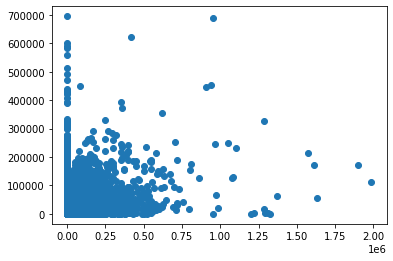

In [23]:
# Смотрим отсечку по значениям и убираем редких клиентов с аномальным nbi & income
print(nbi_drop.sort_values(by=['income']).reset_index()[nbi_drop.index<49000].iloc[-1].income)
print(nbi_drop.sort_values(by=['nbi']).reset_index()[nbi_drop.index<49000].iloc[-1].nbi)

#fig = px.scatter(nbi_drop[(nbi_drop.income < 2000000) & (nbi_drop.nbi < 700000)], x="income", y="nbi")
#fig.show()
plt.scatter(nbi_drop[(nbi_drop.income < 2000000) & (nbi_drop.nbi < 700000)].income,\
    nbi_drop[(nbi_drop.income < 2000000) & (nbi_drop.nbi < 700000)].nbi)
plt.show()

nbi_drop = nbi_drop[(nbi_drop.income != 0) & (nbi_drop.income < 155000) & (nbi_drop.nbi < 95000)]


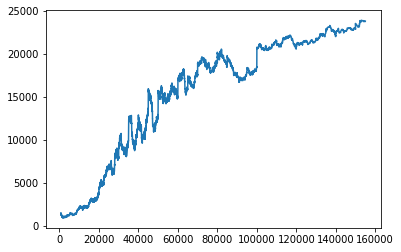

In [24]:
# график зависимоти дохода клиента и дохода банка от данного клиента
nbi_drop = nbi_drop.sort_values(by=['income']) #сортиурем по возрастанию дохода для корректного соединения графика

x = nbi_drop.income
y = nbi_drop.nbi.to_frame().rolling(500).mean() #скользящее среднее для сглаживания графика
#plt.yscale(value='log')
plt.plot(x,y)


In [25]:
#nbi_drop.nbi.ewm(alpha=0.5, adjust=False). mean()

In [26]:
#df['nbi_0'] = df.nbi.fillna(0)
#df.drop('nbi_0', axis=1)


In [27]:
# Добавим график со средней суммой транзакции
# /заметка/ slice = df[df['index'].isin(list(nbi_drop.index)) == True] #срез основного df по нужным индексам не потребовался, объединяется и так
nbi_drop = nbi_drop.sort_index()
nbi_drop['Avg_trx'] = df.Avg_trx
nbi_drop.head()

,nbi,income,Avg_trx
9,6065.052515,22100.00,3915.032892
10,8009.940315,36694.37,1323.992698
11,684.233442,1293.60,215.688611
12,157.694118,44169.00,1202.188857
13,3054.122311,62108.23,4145.593968


Text(180000, 17000, 'Видим разницу темпов прироста кривых. Доход банка от клиента почти не теряет\nв темпе по мере роста состоятельности клиента. Можем сделать вывод,\nчто для более сост-х клиентов не так важна средняя сумма транзакции.\nЭто может быть связано с высокой комиссей обслуживания премиального счета/\nличного инвестиционного консультанта/ крупных наличных кредитов')

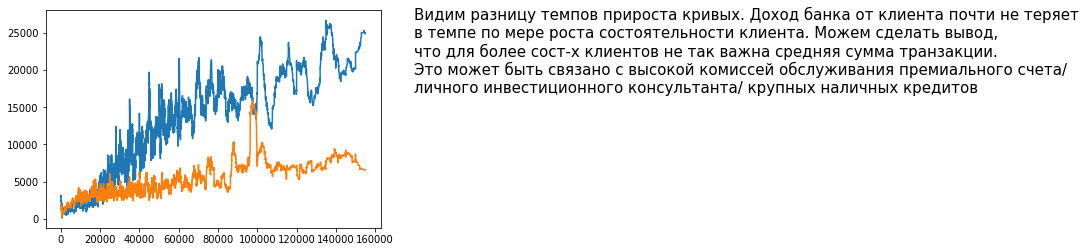

In [28]:
nbi_drop = nbi_drop.sort_values(by=['income'])
nbi_drop.dropna(inplace=True)

x = nbi_drop.income
y1 = nbi_drop.nbi.to_frame().rolling(100).mean() #скользящее среднее для сглаживания графика
y2 = nbi_drop.Avg_trx.to_frame().rolling(100).mean()
#plt.yscale(value='log')
plt.plot(x,y1)
plt.plot(x,y2)

plt.text(180000, 17000, 'Видим разницу темпов прироста кривых. \
Доход банка от клиента почти не теряет\nв темпе по мере роста состоятельности клиента. \
Можем сделать вывод,\nчто для более сост-х клиентов не так важна средняя сумма транзакции.\n\
Это может быть связано с высокой комиссей обслуживания премиального счета/\nличного \
инвестиционного консультанта/ крупных наличных кредитов', fontsize=15)

In [29]:
# Добавим график с кол-ом суммой транзакции
nbi_drop = nbi_drop.sort_index()
nbi_drop['dc_trx_cnt'] = df.dc_trx_cnt
nbi_drop.head()

,nbi,income,Avg_trx,dc_trx_cnt
9,6065.052515,22100.00,3915.032892,83
10,8009.940315,36694.37,1323.992698,341
11,684.233442,1293.60,215.688611,72
12,157.694118,44169.00,1202.188857,105
13,3054.122311,62108.23,4145.593968,189


[None, None, None, None, None, None]

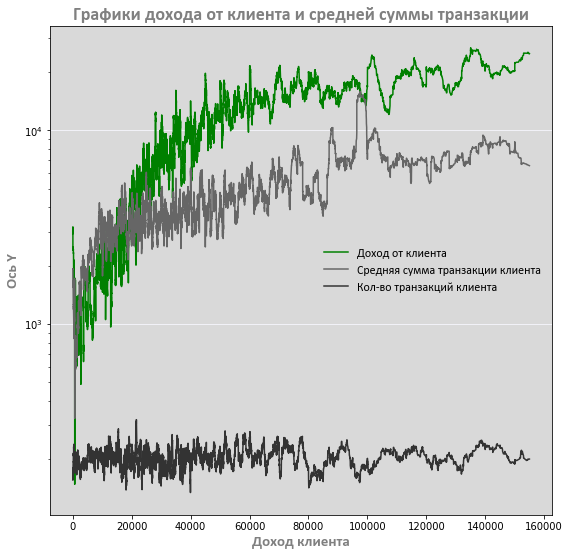

In [30]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,9
rcParams['axes.facecolor']= '0.85'

title_dict = {'fontsize':18, 
              'fontweight':'bold',
              'color':'#808080',
              'family':'Calibri'}

labels_dict = {'fontsize':15, 
              'fontweight':'bold',
              'color':'#808080',
              'family':'Calibri'}

legend_dict = {'family':'Calibri', 'size':12}

#задаем третью фичу
y3 = nbi_drop.dc_trx_cnt.to_frame().rolling(100).mean() 

plt.plot(x,y1, color='green')
plt.plot(x,y2, color='0.4')
plt.plot(x,y3, color='0.2')

plt.yscale(value='log')

plt.grid(axis='y', color='ghostwhite')
plt.title('Графики дохода от клиента и средней суммы транзакции', fontdict = title_dict)
plt.xlabel('Доход клиента', fontdict = labels_dict)
plt.ylabel('Ось Y', fontdict = labels_dict)

legend = plt.legend(labels=['Доход от клиента','Средняя сумма транзакции клиента', 'Кол-во транзакций клиента'],\
    loc='center right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='black')


Text(200000, 280, 'Убедились, что кол-во транзакций (новый график)\nне сильно влияет на прирост трат относительно\nдохода по клиенту. Начиная с дохода уровня\n75к график в боковике')

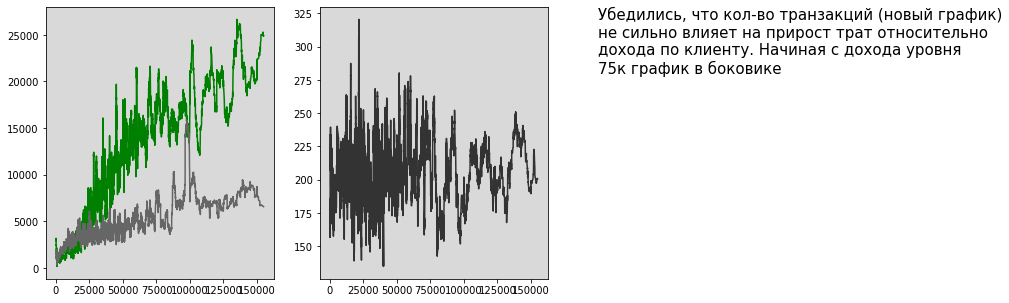

In [45]:
fig, ax = plt.subplots(nrows=1,ncols=2)
ax1, ax2 = ax.flatten()
ax1.plot(x,y1, color='green')
ax1.plot(x,y2, color='0.4')
ax2.plot(x,y3, color='0.2')
fig.set_size_inches(9,5)

plt.text(200000, 280, 'Убедились, что кол-во транзакций (новый график)\nне сильно влияет на\
 прирост трат относительно\nдохода по клиенту. Начиная с дохода уровня\n75к график в боковике', fontsize=15)


In [32]:
# Добавим график с кол-ом суммой транзакции
nbi_drop = nbi_drop.sort_index()
nbi_drop['dc_trx_cnt'] = df.dc_trx_cnt
nbi_drop.head()


,nbi,income,Avg_trx,dc_trx_cnt
9,6065.052515,22100.00,3915.032892,83
10,8009.940315,36694.37,1323.992698,341
11,684.233442,1293.60,215.688611,72
12,157.694118,44169.00,1202.188857,105
13,3054.122311,62108.23,4145.593968,189


In [33]:
# Добавим график с кол-ом суммой транзакции
nbi_drop = nbi_drop.sort_index()
nbi_drop['dc_trx_cnt'] = df.dc_trx_cnt
nbi_drop.head()


,nbi,income,Avg_trx,dc_trx_cnt
9,6065.052515,22100.00,3915.032892,83
10,8009.940315,36694.37,1323.992698,341
11,684.233442,1293.60,215.688611,72
12,157.694118,44169.00,1202.188857,105
13,3054.122311,62108.23,4145.593968,189


Text(0.5, 0.01, 'Два графика')

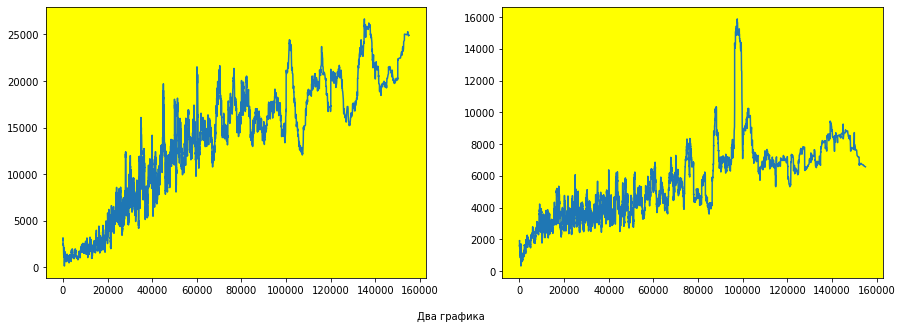

In [34]:
fig, ax = plt.subplots(nrows=1,ncols=2)
ax1, ax2 = ax
ax1.plot(x,y1)
ax2.plot(x,y2)

ax1.set_facecolor('yellow')
ax2.set_facecolor('yellow')
fig.set_size_inches(15,5)

txt = 'Два графика'
fig.text(.5, .01, txt, ha='center')

## Seaborn

In [35]:
nbi_drop.head()

,nbi,income,Avg_trx,dc_trx_cnt
9,6065.052515,22100.00,3915.032892,83
10,8009.940315,36694.37,1323.992698,341
11,684.233442,1293.60,215.688611,72
12,157.694118,44169.00,1202.188857,105
13,3054.122311,62108.23,4145.593968,189


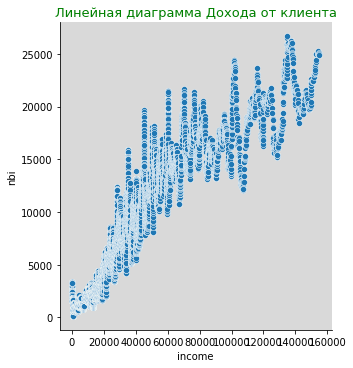

In [36]:
nbi_drop = nbi_drop.sort_values(by=['income'])

sns.relplot(
    x='income',
    y= nbi_drop.nbi.to_frame().rolling(100).mean().nbi, 
    #hue='Promotion', 
    #style='weekend', 
    dashes=True, 
    markers=True,
    data=nbi_drop,
    kind='scatter', 
    ci=None)




plt.title('Линейная диаграмма Дохода от клиента', size=13, color='g');

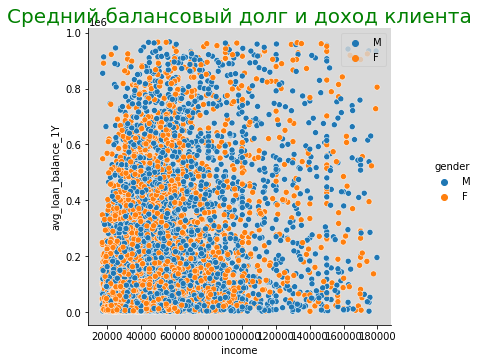

In [37]:
#Строим график зависимости среднего долга и дохода.\
# График тянется к осям, соответственно, для состоятельных клиентов характерен меньший долг

income_drop = df.copy(deep=True)
income_drop.dropna(subset=['income','gender', 'avg_loan_balance_1Y'], inplace=True)
income_drop = income_drop[(income_drop.income > 0) & (income_drop.avg_loan_balance_1Y > 0)]

# пробуем отсеять аномальные значения по квантилям
q1 = income_drop.avg_loan_balance_1Y.quantile(0.95)
q2 = income_drop.avg_loan_balance_1Y.quantile(0.05)
q11 = income_drop.income.quantile(0.95)
q22 = income_drop.income.quantile(0.05)
income_drop = income_drop[(income_drop.avg_loan_balance_1Y < q1) & (income_drop.avg_loan_balance_1Y > q2) &\
    (income_drop.income < q11) & (income_drop.income > q22)]

#income_drop = income_drop.sort_values(by=['avg_loan_balance_1Y'])
#income_drop.shape

sns.relplot(
    x='income',
    y='avg_loan_balance_1Y',
    hue='gender',
    #style='weekend', 
    kind='scatter', 
    ci='sd', 
    data=income_drop)
plt.title('Средний балансовый долг и доход клиента', size=20, color='g');
plt.legend();

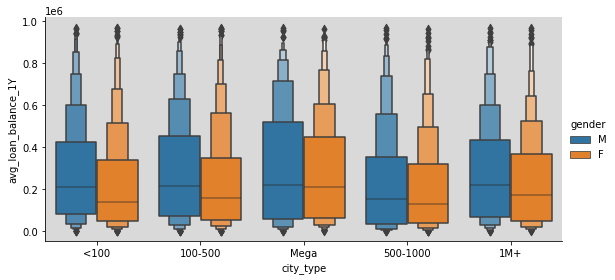

In [38]:
# Строим catplot по долгу в разбивке по крупности городов и полу
# Клиенты ж.пола имеют меньший балансовый долг, видно по квартилям.
# Долговая нагрузка клиентов сосредоточена в диапазоне до 500к, более высокие значения рассеиваются до 1млн

income_drop_2 = income_drop.copy(deep=True)
income_drop_2.dropna(subset=['city_type'], inplace=True)

sns.catplot(
    x='city_type',
    y='avg_loan_balance_1Y',
    data=income_drop_2,
    kind='boxen',
    hue='gender',
    height=4, 
    aspect=2);

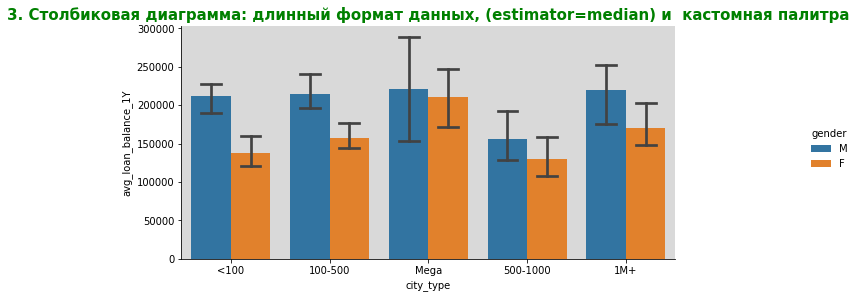

In [39]:
from numpy import median
sns.catplot(
    x='city_type', 
    y='avg_loan_balance_1Y', 
    data=income_drop_2, 
    kind='bar', 
    hue='gender', 
    #hue_order=['Yes','No'], 
    #palette={"Yes": "r", "No": "indigo"},
    estimator=median, 
    capsize=0.2, 
    height=4, 
    aspect=2); 

plt.title('3. Столбиковая диаграмма: длинный формат данных, (estimator=median) и  кастомная палитра',
          size=15, 
          color='g', 
          weight='bold');

c:\Users\brigh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\brigh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1689: FutureWarning:

The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.



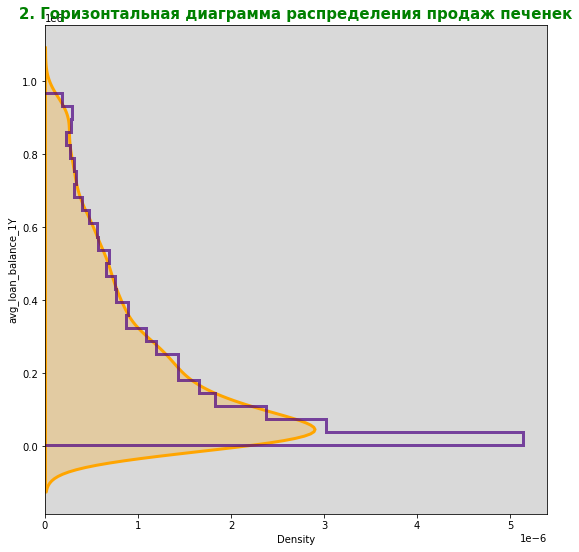

In [40]:
sns.distplot(
    income_drop.avg_loan_balance_1Y,
    vertical=True,                #hist=False
    hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.7, "color": "indigo", "label": "Histogram"},
    kde_kws={"shade": True, "color": "orange", "lw": 3, "label": "KDE"})           
plt.title('2. Горизонтальная диаграмма распределения продаж печенек', size=15, color='g', weight='bold')             
plt.show();

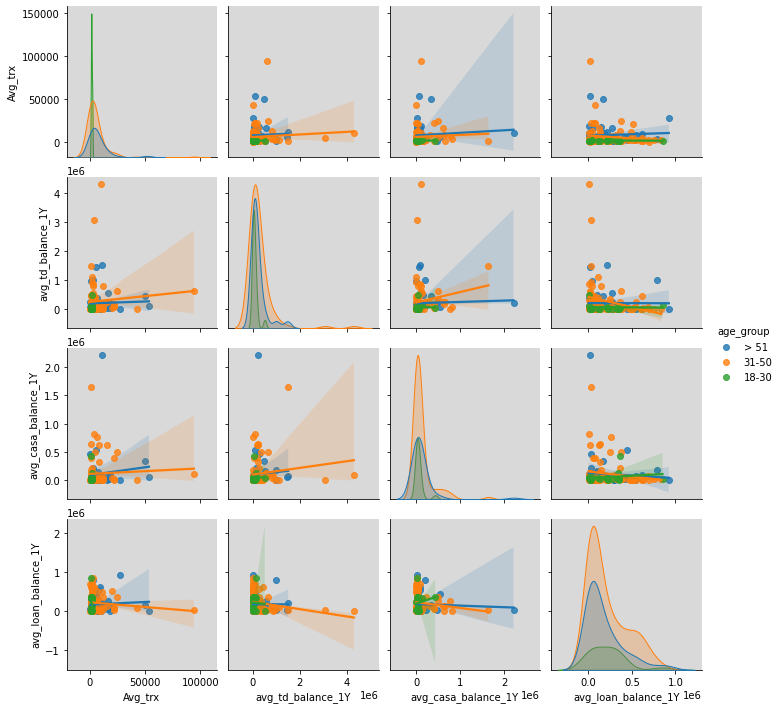

In [70]:
# Из серии графиков ниже можно сделать вывод. Необходимо отметить, что из-за фильтра по депозиту > 0 в датасете осталось 150 строк
# Поэтому в связи с малой репрезентативностью можно рассматривать как учебный пример
# Интересно, что отсутствует значимая корреляция поопарно между депозитом / долгом / средней суммой транзакции / средним остатком на счете
# Можно отметить незначительную обратную зависимость среднего баланосового долга и депозита (-0.2)
# Возрастная группа 31-50 лет отличается более высоким долгом и остатком на счете (возможно учитывает в себе кредитные средства на счете)
# Вероятно, в мелких городах с населением менее 100тыс. самая высокая дифференциация по уровню жизни, что видно из графиков по долгу и депозитам

income_drop_3 = income_drop_2.copy(deep=True)
income_drop_3.dropna(subset=['Avg_trx', 'avg_td_balance_1Y', 'avg_casa_balance_1Y'], inplace=True)
income_drop_3 = income_drop_3[income_drop_3.avg_td_balance_1Y > 0]

items = income_drop_3.loc[:,['Avg_trx', 'avg_td_balance_1Y', 'avg_casa_balance_1Y', 'avg_loan_balance_1Y', 'age_group']]
sns.pairplot(
    items,
    hue='age_group',
    kind='reg'
)
plt.show();

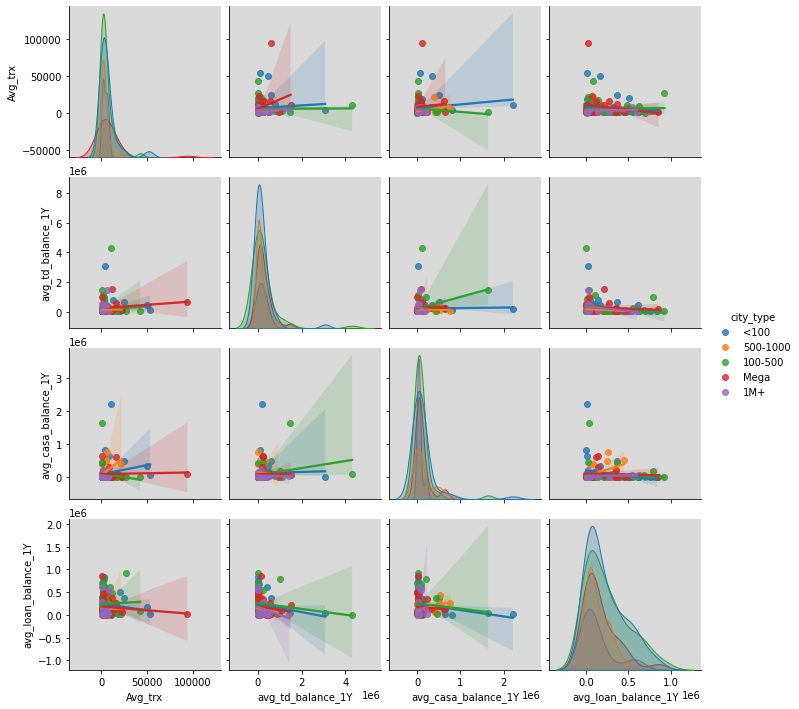

In [71]:
items_1 = income_drop_3.loc[:,['Avg_trx', 'avg_td_balance_1Y', 'avg_casa_balance_1Y', 'avg_loan_balance_1Y', 'city_type']]
sns.pairplot(
    items_1,
    hue='city_type',
    kind='reg'
)
plt.show();

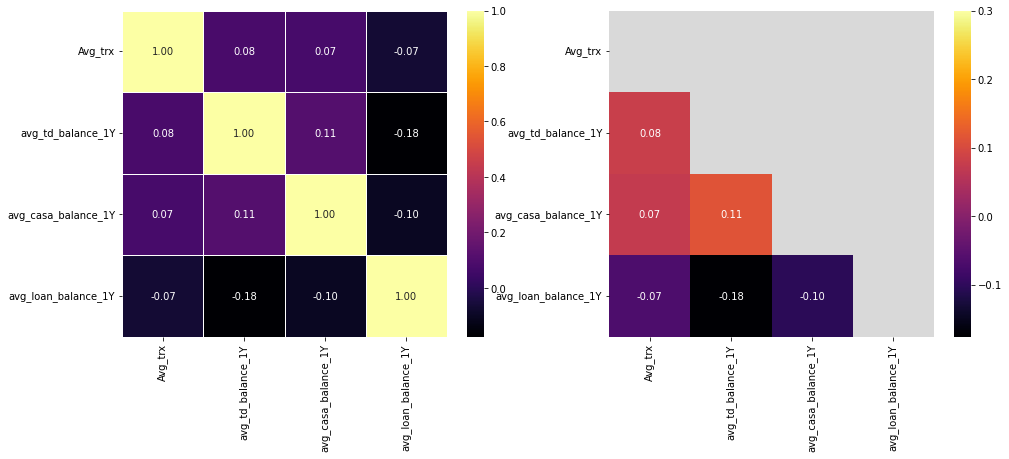

In [72]:
corr = items.corr()

fig, (ax1, ax2)= plt.subplots(1,2, figsize=(16,6))
sns.heatmap(corr, annot=True, fmt='.2f',linewidths=.5, cmap="inferno", ax=ax1)

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=.3, annot=True, fmt='.2f', cmap="inferno", ax=ax2)
plt.show();

In [73]:
# Проверим корреляцию на аналгичном df, только без депозитов. Выборка репрезентативна - около 4.7 тыс. строк

income_drop_3_without_td = income_drop_2.copy(deep=True)
income_drop_3_without_td.dropna(subset=['nbi', 'Avg_trx', 'avg_td_balance_1Y', 'avg_casa_balance_1Y', 'dc_trx_cnt', 'dc_trx_sum'], inplace=True)
#income_drop_3_without_td = income_drop_3_without_td[(income_drop_3_without_td.avg_td_balance_1Y > 0) &\
#   (income_drop_3_without_td.Avg_trx > 0) & (income_drop_3_without_td.avg_casa_balance_1Y > 0)]
income_drop_3_without_td.shape

(4734, 30)

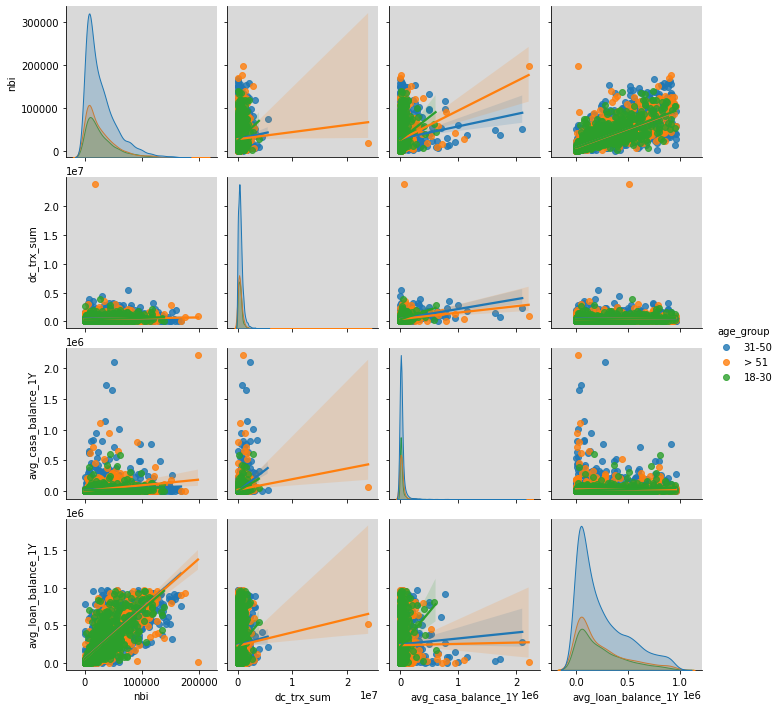

In [74]:
# Из парных графиков ниже и карты корреляции можно сделать следующие выводы:
# Средний балансовый долг клиента и дохода банка от клиента сильно зависимы (corr 0.76)
# Средняя сумма транзакции не влияет на доход от клиента, что объясняется отсутствием плат по стандартным операциям
# Доход от клиента визуально линейно зависит от долговой нагрузки
# По мере роста долговой нагрузки разброс дохода банка увеличиватся, что вероятно обсуловлено:
#  1) большие кредиты подразумевают более высокий % (например низкий долг может быть в рамках беспроцентной кредитной карты)
#     при этом % может быть ниже в рамках крупных целевых кредитов,
#     также клиент может дисциплинировано относитс к погашению крупного кредита (ипотека, автомобиль)
#  2) более объемные кредитные продукты могут включать доп. комиссии и неустойки, плату за досрочный возврат
#     что особенно актуально если бы в выборке присутствовали юр.лица
# Есть небольшая зависимость дохода банка и остатка по счету клиенто, что обусловлено более дорогим обслуживанием

items = income_drop_3_without_td.loc[:,['nbi', 'dc_trx_sum', 'avg_casa_balance_1Y', 'avg_loan_balance_1Y', 'age_group']]
sns.pairplot(
    items,
    hue='age_group',
    kind='reg'
)
plt.show();

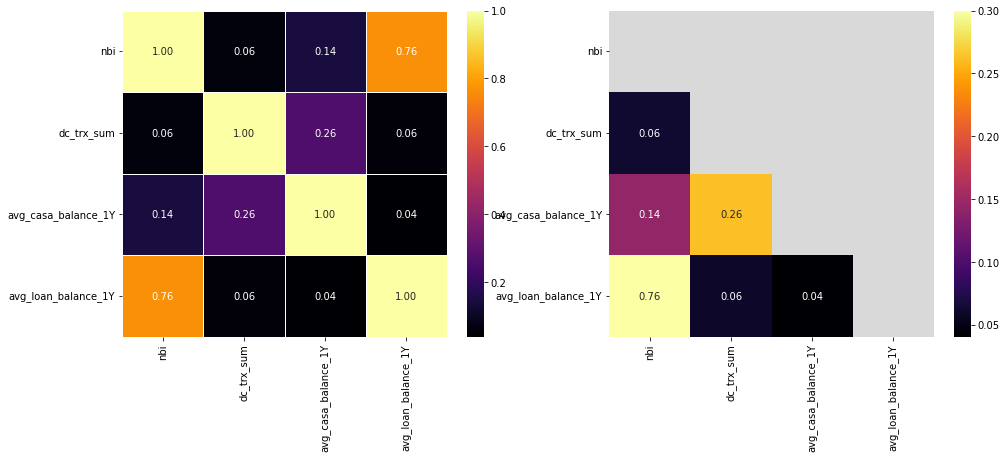

In [75]:
corr = items.corr()

fig, (ax1, ax2)= plt.subplots(1,2, figsize=(16,6))
sns.heatmap(corr, annot=True, fmt='.2f',linewidths=.5, cmap="inferno", ax=ax1)

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=.3, annot=True, fmt='.2f', cmap="inferno", ax=ax2)
plt.show();